In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Dataset importing
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x = df.iloc[:, [2,3]].values
y = df.iloc[:, -1].values

In [5]:
#Spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [8]:
#Creating and fitting training datta in our model or classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [9]:
#Scoring the classifier
classifier.score(x_test, y_test)

0.925

In [10]:
#Prediction of y_test
y_pred = classifier.predict(x_test)
pd.DataFrame(np.hstack((y_pred.reshape(-1,1), y_test.reshape(-1,1))), columns=['Y_pred', 'Y_test'])

,Y_pred,Y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,1,1
76,0,0
77,0,0
78,1,1


In [11]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  2],
       [ 4, 19]])

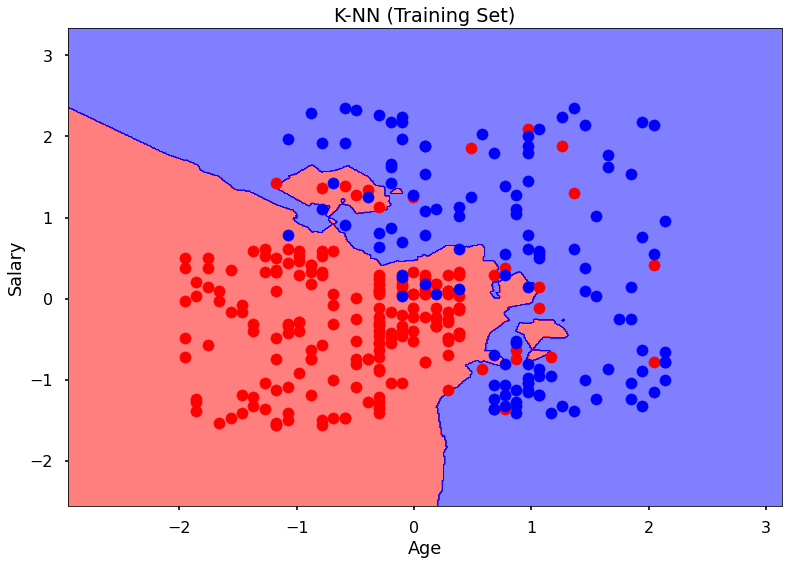

In [12]:
#Visualization 
plt.style.use('seaborn-poster')
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=min(x_set[:,0]-1), stop=max(x_set[:, 0]+1), step=0.01), 
                     np.arange(start=min(x_set[:,1]-1), stop=max(x_set[:, 1]+1), step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            cmap = ListedColormap(('r', 'b')), alpha=0.5)
for j in np.unique(y_set):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j, 1], c=ListedColormap(('r', 'b'))(j), label=j)
plt.xlabel('Age')
plt.ylabel("Salary")
plt.title('K-NN (Training Set)')
plt.show()

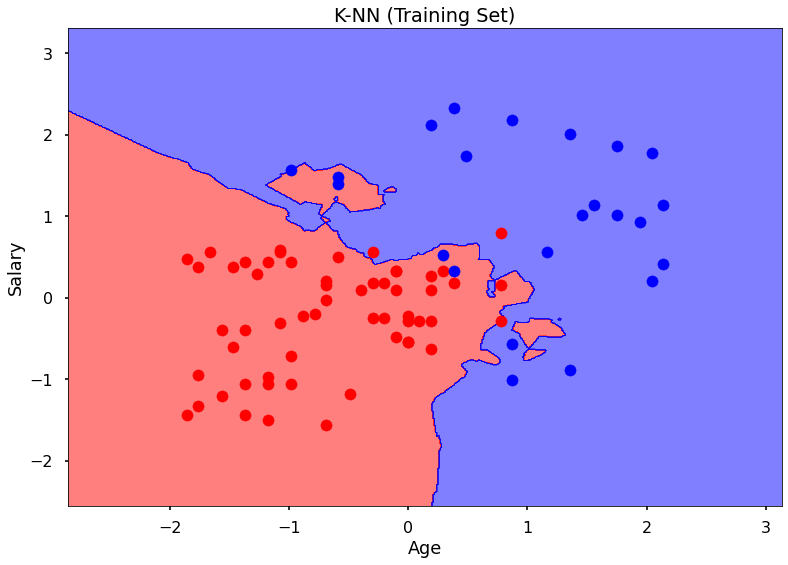

In [13]:
#Visualization test set
plt.style.use('seaborn-poster')
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=min(x_set[:,0]-1), stop=max(x_set[:, 0]+1), step=0.01), 
                     np.arange(start=min(x_set[:,1]-1), stop=max(x_set[:, 1]+1), step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            cmap = ListedColormap(('r', 'b')), alpha=0.5)
for j in np.unique(y_set):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j, 1], c=ListedColormap(('r', 'b'))(j), label=j)
plt.xlabel('Age')
plt.ylabel("Salary")
plt.title('K-NN (Training Set)')
plt.show()